In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BestOneYet.csv")

In [ ]:
df.head()

,Unnamed: 0,Optimum Time quantum,Avg Arrival Time,Max Arrival Time,Min Arrival Time,Avg Burst Time,Max Burst Time,Min Burst Time,Total Completion Time,Number of processes
0,0,12,5.368421,10,0,8.315789,12,1,158,19
1,1,12,4.176471,9,0,8.000000,12,1,136,17
2,2,15,3.866667,10,0,9.866667,15,4,148,15
3,3,13,4.764706,9,0,8.588235,13,3,146,17
4,4,14,4.421053,10,0,9.157895,14,5,174,19


In [ ]:
df

,Unnamed: 0,Optimum Time quantum,Avg Arrival Time,Max Arrival Time,Min Arrival Time,Avg Burst Time,Max Burst Time,Min Burst Time,Total Completion Time,Number of processes
0,0,12,5.368421,10,0,8.315789,12,1,158,19
1,1,12,4.176471,9,0,8.000000,12,1,136,17
2,2,15,3.866667,10,0,9.866667,15,4,148,15
3,3,13,4.764706,9,0,8.588235,13,3,146,17
4,4,14,4.421053,10,0,9.157895,14,5,174,19
...,...,...,...,...,...,...,...,...,...,...
9995,9995,15,5.277778,10,0,8.666667,15,3,156,18
9996,9996,14,4.263158,10,0,7.210526,14,1,137,19
9997,9997,12,5.166667,10,0,8.111111,12,2,146,18
9998,9998,9,5.333333,10,1,7.533333,15,3,113,15


In [ ]:
df.columns

Index(['Unnamed: 0', 'Optimum Time quantum', 'Avg Arrival Time',
       'Max Arrival Time', 'Min Arrival Time', 'Avg Burst Time',
       'Max Burst Time', 'Min Burst Time', 'Total Completion Time',
       'Number of processes'],
      dtype='object')

#EDA

In [ ]:
X = df.drop(['Optimum Time quantum', 'Unnamed: 0'], axis = 'columns')
y = df['Optimum Time quantum']

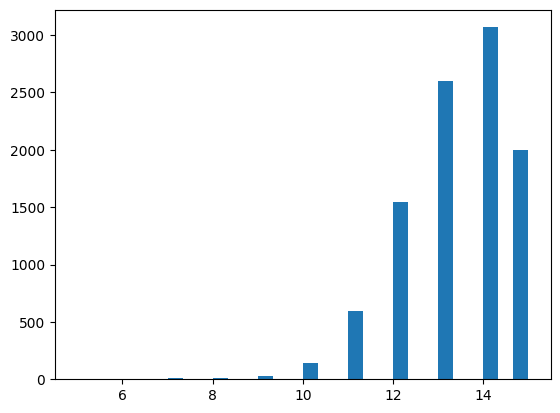

In [ ]:
plt.hist(y, bins = 30)
plt.show()

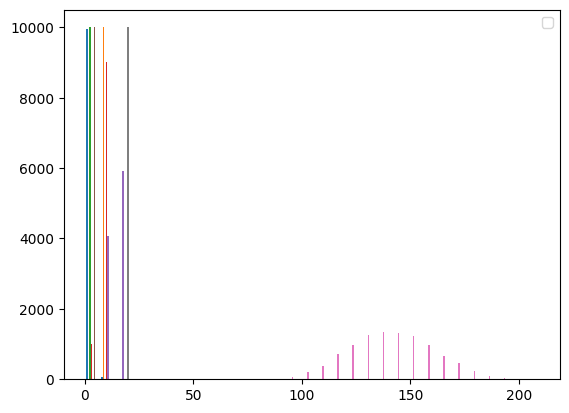

In [ ]:
plt.hist(X, bins = 30)
plt.legend()
plt.show()

In [ ]:
X.head()

,Avg Arrival Time,Max Arrival Time,Min Arrival Time,Avg Burst Time,Max Burst Time,Min Burst Time,Total Completion Time,Number of processes
0,5.368421,10,0,8.315789,12,1,158,19
1,4.176471,9,0,8.000000,12,1,136,17
2,3.866667,10,0,9.866667,15,4,148,15
3,4.764706,9,0,8.588235,13,3,146,17
4,4.421053,10,0,9.157895,14,5,174,19


In [ ]:
y.head()

0    12
1    12
2    15
3    13
4    14
Name: Optimum Time quantum, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Size and shape of X_train respectively are",X_train.size,"and",X_train.shape)
print("Size and shape of X_test respectively are",X_test.size,"and",X_test.shape)
print("Size and shape of y_train respectively are",y_train.size,"and",y_train.shape)
print("Size and shape of y_test respectively are",y_test.size,"and",y_test.shape)

Size and shape of X_train respectively are 56000 and (7000, 8)
Size and shape of X_test respectively are 24000 and (3000, 8)
Size and shape of y_train respectively are 7000 and (7000,)
Size and shape of y_test respectively are 3000 and (3000,)


#Linear Regression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
predictions

array([14.6876091 , 13.97971657, 14.84278908, ..., 12.91896689,
       14.01995117, 13.87484133])

In [ ]:
y_test

6252    15
4684    14
1731    15
4742    13
4521    12
        ..
8014    13
1074    14
3063    13
6487    14
4705    14
Name: Optimum Time quantum, Length: 3000, dtype: int64

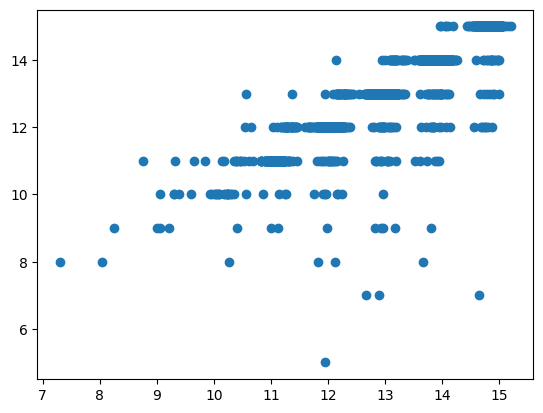

In [ ]:
plt.scatter(predictions,y_test)
plt.show()

In [ ]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.826
MAE =  0.239
MSE =  0.285
RMSE =  0.534


#Ridge Regression

In [ ]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
predictions = ridge.predict(X_test)

In [ ]:
predictions

array([14.6876059 , 13.97963491, 14.84275486, ..., 12.91902683,
       14.01996796, 13.87479989])

In [ ]:
y_test

6252    15
4684    14
1731    15
4742    13
4521    12
        ..
8014    13
1074    14
3063    13
6487    14
4705    14
Name: Optimum Time quantum, Length: 3000, dtype: int64

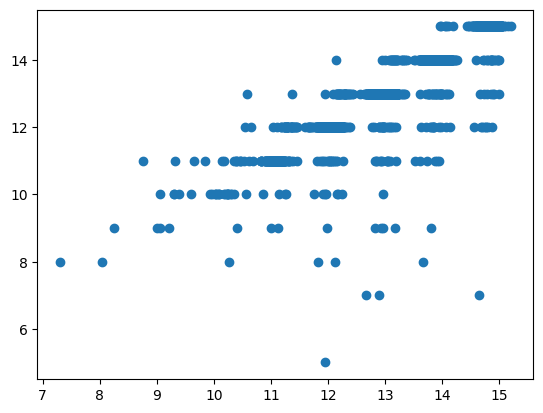

In [ ]:
plt.scatter(predictions,y_test)
plt.show()

In [ ]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.826
MAE =  0.239
MSE =  0.285
RMSE =  0.534


#Lasso Regression

In [ ]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
predictions = lasso.predict(X_test)
predictions

array([14.47882651, 13.73959154, 14.59521882, ..., 13.20881417,
       13.91418001, 13.70321894])

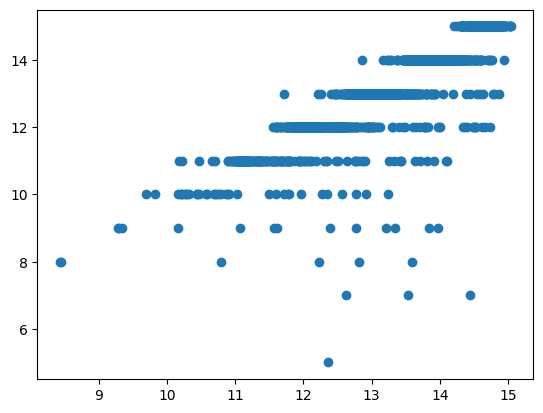

In [ ]:
plt.scatter(predictions,y_test)
plt.show()

In [ ]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.791
MAE =  0.335
MSE =  0.343
RMSE =  0.585


#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)

In [ ]:
X_polynomial = poly_reg.fit_transform(X_train)

In [ ]:
lreg = LinearRegression()  
lreg.fit(X_polynomial, y_train)  

LinearRegression()

In [ ]:
predictions = lreg.predict(poly_reg.fit_transform(X_test))
predictions

array([14.71175596, 13.93286237, 14.91340996, ..., 12.57727834,
       13.9892315 , 13.95628937])

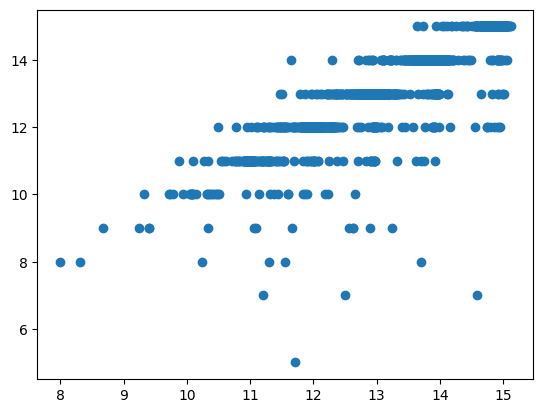

In [ ]:
plt.scatter(predictions,y_test)
plt.show()

In [ ]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.84
MAE =  0.215
MSE =  0.262
RMSE =  0.512


#Bayesian Ridge Regression

In [ ]:
from sklearn.linear_model import BayesianRidge 

In [ ]:
br = BayesianRidge()  
br.fit(X_train, y_train)  

BayesianRidge()

In [ ]:
predictions = lreg.predict(poly_reg.fit_transform(X_test))
predictions

array([14.71175596, 13.93286237, 14.91340996, ..., 12.57727834,
       13.9892315 , 13.95628937])

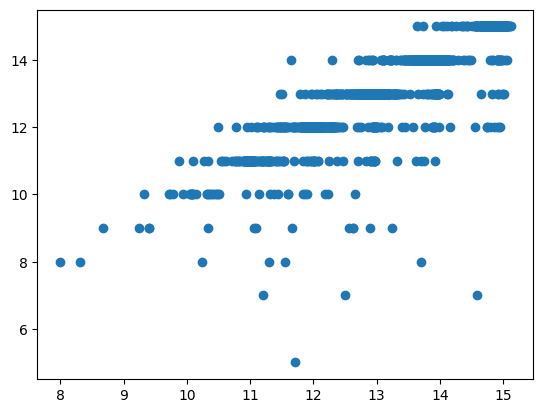

In [ ]:
plt.scatter(predictions,y_test)
plt.show()

In [ ]:
print("R2 value = ",round(metrics.r2_score(y_test,predictions),3))
print("MAE = ",round(metrics.mean_absolute_error(y_test,predictions),3))
print("MSE = ",round(metrics.mean_squared_error(y_test,predictions),3))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))

R2 value =  0.84
MAE =  0.215
MSE =  0.262
RMSE =  0.512
